## Final Project Submission

Please fill out:
* Student name: Ryan Sims
* Student pace: full time
* Scheduled project review date/time: 1-23-19 7:30 a.m PST
* Instructor name: Rafael Carrasco
* Blog post URL: https://rhynos44.github.io/


# Introduction  
  
    
    Given several data files about movies, this notebook will walk through questions about important things to consider when assesing the type of movie a new production company should produce.  

# Questions:  
1. What are the top grossing movies?  
2. Which month would be best for the release date?  
3. Which genres are the most popular amongs top grossing films?  
4. Is there any relationship between the top films' ROI's and their average ratings?  
5. Who are the actors and actresses that appear the most in top-grossing films?

# Import data files  

Using pandas and functions to repeat the process of bringing in the different data files with the same file type.

In [53]:
import pandas as pd
import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from glob import glob

In [54]:
csv_files = glob("./zippedData/*.csv.gz")
print(csv_files)

tsv_files = ['./zippedData/rt.reviews.tsv', './zippedData/rt.movie_info.tsv.gz']

['./zippedData/imdb.title.crew.csv.gz', './zippedData/tmdb.movies.csv.gz', './zippedData/imdb.title.akas.csv.gz', './zippedData/imdb.title.ratings.csv.gz', './zippedData/imdb.name.basics.csv.gz', './zippedData/imdb.title.basics.csv.gz', './zippedData/tn.movie_budgets.csv.gz', './zippedData/bom.movie_gross.csv.gz', './zippedData/imdb.title.principals.csv.gz']


In [55]:
clean_names = {}

for name in csv_files:
    
    file_clean = name.replace('./', '').replace('zippedData/', '').replace('.csv.gz', '').replace('.', '_')
    
    file_df = pd.read_csv(name, index_col = 0)
    
    clean_names[file_clean] = file_df

In [56]:
clean_names.keys()

dict_keys(['imdb_title_crew', 'tmdb_movies', 'imdb_title_akas', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_basics', 'tn_movie_budgets', 'bom_movie_gross', 'imdb_title_principals'])

## Get df's into SQL tables  

Using SQL will make it easier to join columns from different tables

In [57]:
conn = sqlite3.connect('movies_db.sqlite')

In [58]:
def gen_df_to_sql_table(df, name, conn):
    
    try:
        df.to_sql(name, conn)
        print('Generated {} table'.format(name))
        
    except Exception as e:
        print('Could not generate')
        print(e)

In [59]:
for name, table in clean_names.items():
    gen_df_to_sql_table(table, name, conn)
    

Could not generate
Table 'imdb_title_crew' already exists.
Could not generate
Table 'tmdb_movies' already exists.
Could not generate
Table 'imdb_title_akas' already exists.
Could not generate
Table 'imdb_title_ratings' already exists.
Could not generate
Table 'imdb_name_basics' already exists.
Could not generate
Table 'imdb_title_basics' already exists.
Could not generate
Table 'tn_movie_budgets' already exists.
Could not generate
Table 'bom_movie_gross' already exists.
Could not generate
Table 'imdb_title_principals' already exists.


In [60]:
#same method for csv files but adapted to tsv 
clean_tsv = {}
for name in tsv_files:
    
    file_clean = name.replace('./zippedData/', '').replace('.tsv', '').replace('.gz', '').replace('.', '_')
    
    file_df = pd.read_csv(name, index_col = 0, delimiter='\t', encoding='unicode_escape')
    
    clean_tsv[file_clean] = file_df

In [61]:
clean_tsv.keys()

dict_keys(['rt_reviews', 'rt_movie_info'])

In [62]:
for name, table in clean_tsv.items():
    gen_df_to_sql_table(table, name, conn)
    

Could not generate
Table 'rt_reviews' already exists.
Could not generate
Table 'rt_movie_info' already exists.


In [63]:
with open("./.gitignore", "w+") as f:
    f.write("*.sqlite") 
    f.write("\n") 
    f.write("zippedData/")
    f.write("\n")
    f.write("zippedData/*.csv")
    f.write("\n")
    f.write("zippedData/*.gz")
    f.write("zippedData/*.tsv")

## Inspect Data tables  

The IMDB tables have keys for movie titles and cast names.  This is where SQL will make it easy to join.  The tables with budget information will help with any business related analysis.

In [64]:

table_query = conn.execute("select name from sqlite_master where type = 'table';").fetchall()   

tables = [i[0] for i in table_query]
tables

['imdb_title_crew',
 'tmdb_movies',
 'imdb_title_akas',
 'imdb_title_ratings',
 'imdb_name_basics',
 'imdb_title_basics',
 'tn_movie_budgets',
 'bom_movie_gross',
 'imdb_title_principals',
 'rt_reviews',
 'rt_movie_info',
 'top500',
 'top500_gross',
 'eda']

In [65]:
for name in tables:
    df = pd.read_sql_query("select * from {};".format(name), conn)
    print("Table : {}".format(name))
    display(df.head())
    print('\n\n')

Table : imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943





Table : tmdb_movies


,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186





Table : imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0





Table : imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21





Table : imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"





Table : imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"





Table : tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"





Table : bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010





Table : imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"





Table : rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,None,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,None,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,None,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,None,fresh,None,0,Cinema Scope,"October 12, 2017"





Table : rt_movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",None,None,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",None,None,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",None,None,128 minutes,None
4,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,None,None,200 minutes,None





Table : top500


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
1,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
2,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224





Table : top500_gross


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr
1,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun
2,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Apr
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May
4,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Feb





Table : eda


,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,runtime_minutes,genres,roi


# Question 1: What are the top grossing films?

- Look at the bugest-based tables and clean the data  
-- Can they be joined on movie title?  
-- Make sure the dollar amounts are listed as numbers instead of strings  
-- investigate 'NaN's' or anything missing with budget data


In [66]:
query = """SELECT * FROM tn_movie_budgets AS tn
           JOIN bom_movie_gross AS bom 
           ON bom.title = tn.movie;"""

movie_budget_df = pd.read_sql_query(query, conn)
movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title,studio,domestic_gross,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",Justice League,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Spectre,Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...
1242,68,"Apr 27, 2012",Sound of My Voice,"$135,000","$408,015","$429,448",Sound of My Voice,FoxS,408000.0,None,2012
1243,73,"Jun 15, 2012",Your Sister's Sister,"$120,000","$1,597,486","$3,090,593",Your Sister's Sister,IFC,1600000.0,None,2012
1244,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",The Gallows,WB (NL),22800000.0,20200000,2015
1245,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798","$2,769,782",A Ghost Story,A24,1600000.0,None,2017


In [67]:
tn_movie_budget_df = clean_names['tn_movie_budgets']
tn_movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [68]:
bom_movie_gross_df = clean_names['bom_movie_gross']
bom_movie_gross_df.info()
bom_movie_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [69]:
check_same_list = list(bom_movie_gross_df.index)
print(len(check_same_list))

same_films = tn_movie_budget_df[tn_movie_budget_df.movie.apply(lambda x: x in check_same_list)]
print(len(same_films))
same_films.head()

3387
1247


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [70]:
# if the value of the column is a string with $ or , then get only the digits
# if the string is just digits, leave it be

def cln_string(string):
    if not pd.isnull(string):
        return("".join(d for d in str(string) if str(d).isdigit()))
    else:
        return(string)

In [71]:
# tn movie budget has budget columns as strings that are more useful as integers

budget_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in budget_cols:
    same_films[col] = same_films[col].apply(cln_string).astype(int)

same_films[budget_cols].info()
same_films[budget_cols]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 2 to 18
Data columns (total 3 columns):
production_budget    1247 non-null int64
domestic_gross       1247 non-null int64
worldwide_gross      1247 non-null int64
dtypes: int64(3)
memory usage: 39.0 KB


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,production_budget,domestic_gross,worldwide_gross
id,,,
2,410600000,241063875,1045663875
4,330600000,459005868,1403013963
7,300000000,678815482,2048134200
9,300000000,229024295,655945209
10,300000000,200074175,879620923
...,...,...,...
68,135000,408015,429448
73,120000,1597486,3090593
80,100000,22764410,41656474


In [72]:
same_films.worldwide_gross.describe()

count    1.247000e+03
mean     1.521259e+08
std      2.350238e+08
min      0.000000e+00
25%      1.801962e+07
50%      6.534369e+07
75%      1.721041e+08
max      2.048134e+09
Name: worldwide_gross, dtype: float64

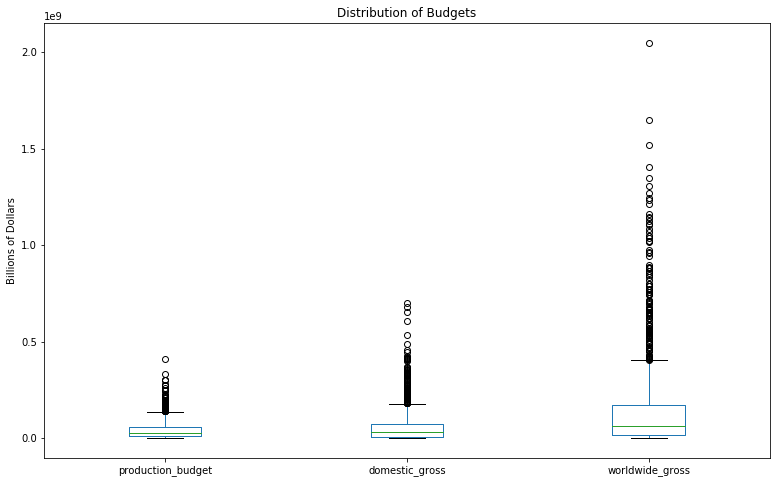

In [73]:

same_films.plot.box(figsize=(13,8))
plt.ylabel("Billions of Dollars")
plt.title("Distribution of Budgets")
plt.show()

In [74]:
# Budget and Gross columns show several outliers but these depict exceptionally successful films
# look at top 500 grossing films

top_500_gross = same_films.sort_values(by='worldwide_gross', ascending=False)[:500]
top_500_gross.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 7 to 63
Data columns (total 5 columns):
release_date         500 non-null object
movie                500 non-null object
production_budget    500 non-null int64
domestic_gross       500 non-null int64
worldwide_gross      500 non-null int64
dtypes: int64(3), object(2)
memory usage: 23.4+ KB


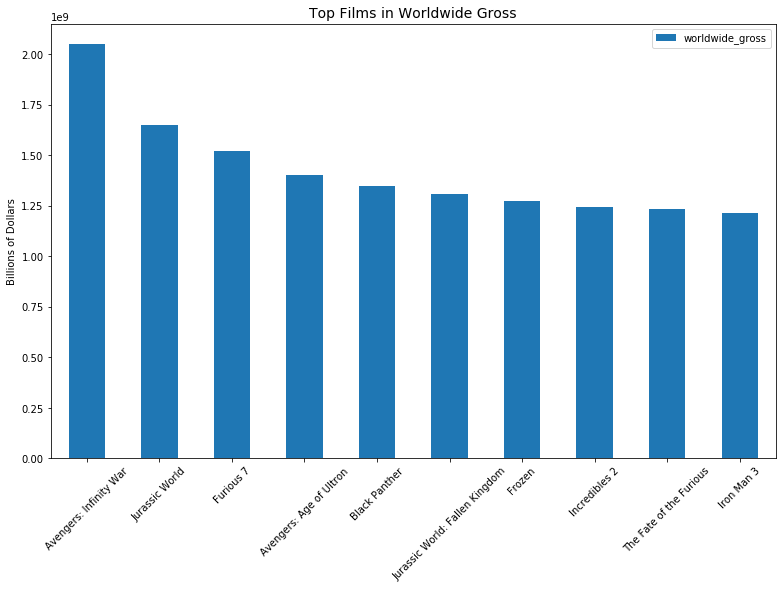

In [75]:
movie_top_50 = top_500_gross[['movie', 'worldwide_gross']].set_index('movie')

movie_top_50[:10].plot(kind='bar', figsize=(13,8), rot=45)

plt.title('Top Films in Worldwide Gross', fontsize=14)
plt.xlabel('')
plt.ylabel('Billions of Dollars')
plt.show()

# Results:  
The top three grossing films are shown as Avengers: Infity War, Jurassic World, and Furious 7.

# Question 2:  
#### Which release month is the most common amongst top films in worldwide gross?

In [76]:
top_500_gross['release_month'] = top_500_gross.release_date.apply(lambda x: x[:3])
top_500_gross.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
id,,,,,,
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun
67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Apr
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May
42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Feb


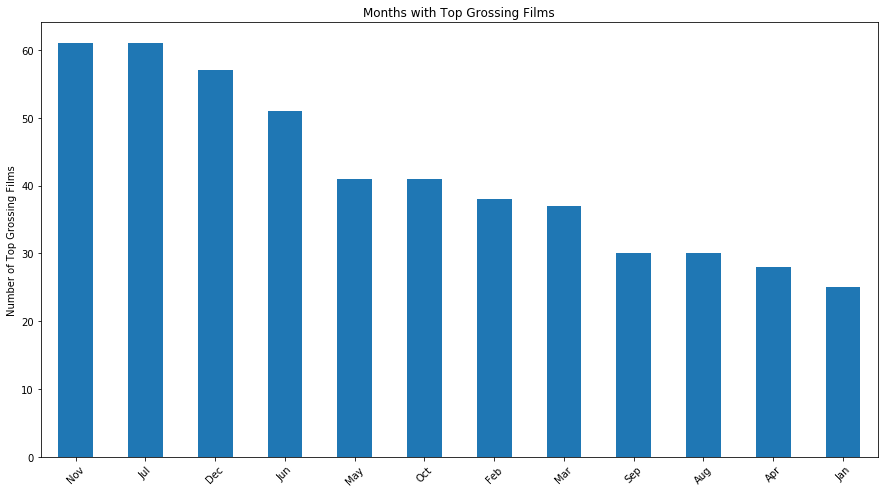

In [77]:
top_500_gross.release_month.value_counts().plot(kind='bar', title='Months with Top Grossing Films', figsize=(15,8), rot=45)

plt.ylabel('Number of Top Grossing Films')
plt.show()

# Results:  
The best time to release a movie is during the summer months, or the holidays. An explanation for the popularity of these two periods could possible be related to breaks in school schedules.

# Question 3:  
#### Which genres are the most common amongst the top grossing films?

In [79]:
top_500_gross.to_sql('top500_gross', conn)

ValueError: Table 'top500_gross' already exists.

In [81]:
query = """SELECT * FROM top500_gross top
           LEFT JOIN imdb_title_basics imdb
           ON top.movie = imdb.primary_title"""

genres_gross_top500 = pd.read_sql_query(query, conn)
genres_gross_top500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 13 columns):
id                   641 non-null int64
release_date         641 non-null object
movie                641 non-null object
production_budget    641 non-null int64
domestic_gross       641 non-null int64
worldwide_gross      641 non-null int64
release_month        641 non-null object
tconst               624 non-null object
primary_title        624 non-null object
original_title       624 non-null object
start_year           624 non-null float64
runtime_minutes      588 non-null float64
genres               611 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 65.2+ KB


In [82]:
genres_gross_top500.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
1,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
2,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Apr,tt2820852,Furious 7,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Feb,tt1825683,Black Panther,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"


In [83]:
# check NaN's replace with 'Not listed' if there arent many nulls
genres_gross_top500.genres.isna().value_counts()


False    611
True      30
Name: genres, dtype: int64

In [84]:
genres_gross_top500.genres = genres_gross_top500.genres.fillna('None listed')
genres_gross_top500.genres.isna().value_counts()

False    641
Name: genres, dtype: int64

In [85]:
# Split multi-genre genres into list to get unique set of genres
genres_gross_top500.genres = genres_gross_top500.genres.apply(lambda x: x.split(','))

In [86]:
genres_gross_top500.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"


In [87]:
unique_genres = set()
for genre in genres_gross_top500['genres']:
    if genre:
        unique_genres.update(genre)
unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'None listed',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [88]:
unique_genres = list(unique_genres)

genre_count = {i : j for i,j in zip(unique_genres, np.zeros(shape=len(unique_genres)))}
for genre in genres_gross_top500.genres:
    if type(genre) == list:
        for element in genre:
            genre_count[element] += 1
    else:
        genre_count[genre] += 1

genre_count

{'Adventure': 223.0,
 'Sport': 10.0,
 'Western': 3.0,
 'War': 2.0,
 'Documentary': 36.0,
 'Music': 9.0,
 'Action': 228.0,
 'None listed': 30.0,
 'Comedy': 200.0,
 'Mystery': 44.0,
 'Thriller': 94.0,
 'Sci-Fi': 72.0,
 'Family': 38.0,
 'Animation': 77.0,
 'Horror': 53.0,
 'History': 20.0,
 'Biography': 41.0,
 'Crime': 60.0,
 'Romance': 53.0,
 'Fantasy': 52.0,
 'Musical': 2.0,
 'Drama': 208.0}

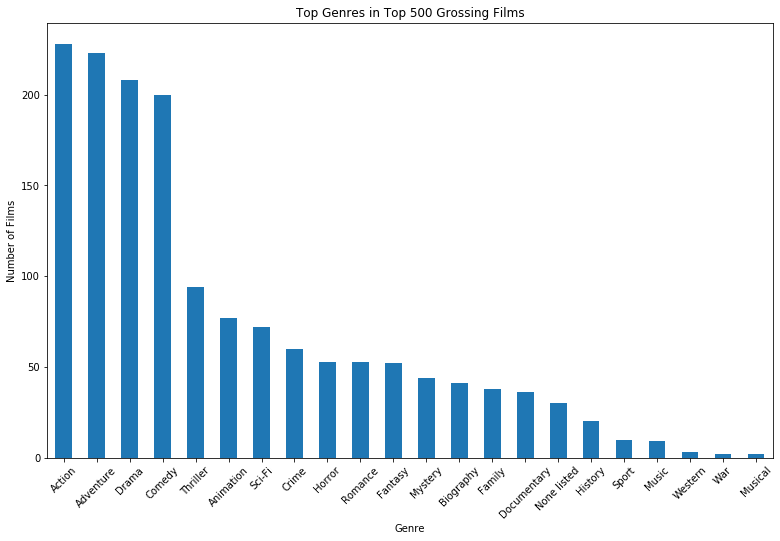

In [116]:
sort_genres = dict(sorted(genre_count.items(), reverse=True, key=lambda x: x[1]))

series_genre = pd.Series(sort_genres)
series_genre.plot(kind='bar', title='Top Genres in Top 500 Grossing Films', figsize=(13,8), rot=45)

plt.ylabel('Number of Films')
plt.xlabel('Genre')
plt.show()

# Results:  
 The top genres to consider for a top grossing film are Action, Advernture, Drama, Comedy, and Thriller

Table is getting a little messy, so the columns that are a bit repetitve and uneccessary can be removed

In [90]:

genres_gross_top500.drop(labels=['primary_title', 'original_title', 'start_year'], axis=1, inplace=True)

In [91]:
genres_gross_top500.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,runtime_minutes,genres
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]"
1,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun,tt0369610,124.0,"[Action, Adventure, Sci-Fi]"
2,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Apr,tt2820852,137.0,"[Action, Crime, Thriller]"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,tt2395427,141.0,"[Action, Adventure, Sci-Fi]"
4,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Feb,tt1825683,134.0,"[Action, Adventure, Sci-Fi]"


# Question 4:  
#### Is there a visual relationship between ROI and the average ratings of the top grossing films?

In [92]:
# ROI func
def roi_func(row):
    return((row['worldwide_gross'] - row['production_budget'])/row['production_budget'])

In [93]:
genres_gross_top500['roi'] = genres_gross_top500.apply(roi_func, axis=1)
genres_gross_top500.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,runtime_minutes,genres,roi
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",5.827114
1,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun,tt0369610,124.0,"[Action, Adventure, Sci-Fi]",6.669092
2,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Apr,tt2820852,137.0,"[Action, Crime, Thriller]",6.993278
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",3.243841
4,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Feb,tt1825683,134.0,"[Action, Adventure, Sci-Fi]",5.741291


In [94]:
# Change df name to something better. eda main represents the main df that is being used for the EDA
eda_main_df = genres_gross_top500

In [95]:
tables


['imdb_title_crew',
 'tmdb_movies',
 'imdb_title_akas',
 'imdb_title_ratings',
 'imdb_name_basics',
 'imdb_title_basics',
 'tn_movie_budgets',
 'bom_movie_gross',
 'imdb_title_principals',
 'rt_reviews',
 'rt_movie_info',
 'top500',
 'top500_gross',
 'eda']

In [96]:
cur = conn.cursor()

In [97]:
cur.execute("""SELECT t.tconst, t.primary_title, r.averagerating
               FROM imdb_title_basics t
               JOIN imdb_title_ratings r
               ON t.tconst = r.tconst
               ;""")

df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df.head()

,tconst,primary_title,averagerating
0,tt0063540,Sunghursh,7.0
1,tt0066787,One Day Before the Rainy Season,7.2
2,tt0069049,The Other Side of the Wind,6.9
3,tt0069204,Sabse Bada Sukh,6.1
4,tt0100275,The Wandering Soap Opera,6.5


In [98]:
eda_main_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,runtime_minutes,genres,roi
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",5.827114
1,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun,tt0369610,124.0,"[Action, Adventure, Sci-Fi]",6.669092
2,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Apr,tt2820852,137.0,"[Action, Crime, Thriller]",6.993278
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",3.243841
4,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Feb,tt1825683,134.0,"[Action, Adventure, Sci-Fi]",5.741291


In [99]:
movie_roi = eda_main_df[['movie', 'roi']]
movie_roi.set_index('movie', inplace=True)
movie_roi.head()

,roi
movie,
Avengers: Infinity War,5.827114
Jurassic World,6.669092
Furious 7,6.993278
Avengers: Age of Ultron,3.243841
Black Panther,5.741291


In [100]:
title_list = [i for i in movie_roi.index]

rating_title = df[df['primary_title'].apply(lambda x: x in title_list)]
rating_title

,tconst,primary_title,averagerating
47,tt0359950,The Secret Life of Walter Mitty,7.3
52,tt0369610,Jurassic World,7.0
61,tt0398286,Tangled,7.8
63,tt0401729,John Carter,6.6
82,tt0429493,The A-Team,6.8
...,...,...,...
72093,tt8917752,Joy,6.5
72869,tt9225192,Unstoppable,6.5
73182,tt9392532,Neighbors,7.6
73775,tt9851050,Sisters,4.7


In [101]:
#This join will subset by the top grossing films and display those films' average ratings and roi
rating_title_roi = rating_title.join(movie_roi, on='primary_title')
rating_title_roi.head()

,tconst,primary_title,averagerating,roi
47,tt0359950,The Secret Life of Walter Mitty,7.3,1.064409
52,tt0369610,Jurassic World,7.0,6.669092
61,tt0398286,Tangled,7.8,1.255682
63,tt0401729,John Carter,6.6,0.028284
82,tt0429493,The A-Team,6.8,0.611283


In [102]:
rating_title_roi.sort_values(by=['roi'], ascending=False, inplace=True)
rating_title_roi.head()

,tconst,primary_title,averagerating,roi
4472,tt1560985,The Devil Inside,4.2,100.759490
5067,tt1591095,Insidious,6.9,65.580591
4079,tt1536044,Paranormal Activity 2,5.7,58.170677
27687,tt2660118,Split,2.9,54.792961
27687,tt2660118,Split,2.9,54.792961


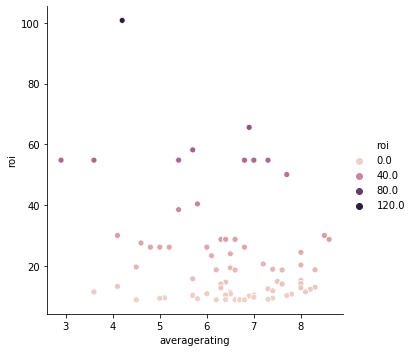

In [103]:

x = rating_title_roi.averagerating
y = rating_title_roi.roi

sns.relplot(x='averagerating', y='roi', hue='roi', data=rating_title_roi[:200])



# Results:  
Looking at the top 200 films based on ROI and worldwide gross, there isn't a clear relationship between the two variables.  The data appears to be grouped in horizontal lines, which means that for any films with an ROI within 40%, those films have ratings from, low to high.

# Question 5:  
#### Of the top grossing films, who are the actors and actresses that appear the most?

In [104]:
tables

['imdb_title_crew',
 'tmdb_movies',
 'imdb_title_akas',
 'imdb_title_ratings',
 'imdb_name_basics',
 'imdb_title_basics',
 'tn_movie_budgets',
 'bom_movie_gross',
 'imdb_title_principals',
 'rt_reviews',
 'rt_movie_info',
 'top500',
 'top500_gross',
 'eda']

In [105]:
cur.execute("""SELECT p.tconst, p.nconst, p.category, n.primary_name
               FROM imdb_title_principals p
               JOIN imdb_name_basics n
               ON p.nconst = n.nconst
               WHERE p.category == 'actor';""")

df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df.head()

,tconst,nconst,category,primary_name
0,tt0111414,nm0246005,actor,Tommy Dysart
1,tt0323808,nm2694680,actor,Henry Garrett
2,tt0323808,nm0574615,actor,Graham McTavish
3,tt0417610,nm0532721,actor,Luis Machín
4,tt0417610,nm0069209,actor,Carlos Belloso


In [106]:
actors = df.set_index('tconst')
actors

,nconst,category,primary_name
tconst,,,
tt0111414,nm0246005,actor,Tommy Dysart
tt0323808,nm2694680,actor,Henry Garrett
tt0323808,nm0574615,actor,Graham McTavish
tt0417610,nm0532721,actor,Luis Machín
tt0417610,nm0069209,actor,Carlos Belloso
...,...,...,...
tt9681728,nm10397910,actor,Danil Tyabin
tt9689618,nm10439726,actor,Christian Lacroix
tt9689618,nm10439727,actor,Christine Spengler


In [107]:
grossing_actors = eda_main_df.join(actors, on='tconst')
grossing_actors.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,runtime_minutes,genres,roi,nconst,category,primary_name
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",5.827114,nm0000375,actor,Robert Downey Jr.
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",5.827114,nm1165110,actor,Chris Hemsworth
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",5.827114,nm0749263,actor,Mark Ruffalo
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",5.827114,nm0262635,actor,Chris Evans
1,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun,tt0369610,124.0,"[Action, Adventure, Sci-Fi]",6.669092,nm0695435,actor,Chris Pratt


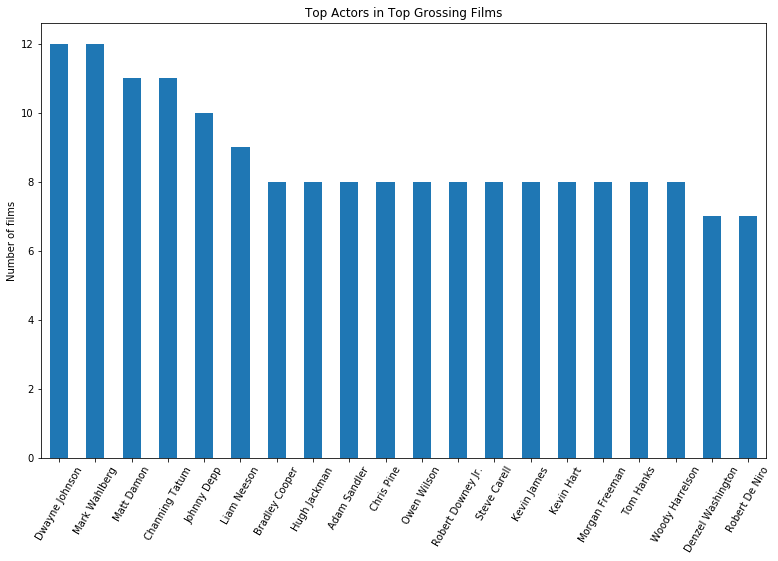

In [121]:
grossing_actors.primary_name.value_counts()[:20].plot(kind='bar', title='Top Actors in Top Grossing Films',figsize=(13,8), rot=60)
plt.ylabel("Number of films")
plt.show()

In [111]:
cur.execute("""SELECT p.tconst, p.nconst, p.category, n.primary_name
               FROM imdb_title_principals p
               JOIN imdb_name_basics n
               ON p.nconst = n.nconst
               WHERE p.category == 'actress';""")

df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df.head()

,tconst,nconst,category,primary_name
0,tt0323808,nm3579312,actress,Brittania Nicol
1,tt0323808,nm0502652,actress,Jacqueline Leonard
2,tt0417610,nm0330974,actress,Esther Goris
3,tt0417610,nm0679167,actress,Florencia Peña
4,tt0469152,nm0036109,actress,Lucie Arnaz


In [112]:
actress = df.set_index('tconst')
actress

,nconst,category,primary_name
tconst,,,
tt0323808,nm3579312,actress,Brittania Nicol
tt0323808,nm0502652,actress,Jacqueline Leonard
tt0417610,nm0330974,actress,Esther Goris
tt0417610,nm0679167,actress,Florencia Peña
tt0469152,nm0036109,actress,Lucie Arnaz
...,...,...,...
tt9672244,nm0260884,actress,Núria Espert
tt9672244,nm0508708,actress,Carmen Liaño
tt9679036,nm9742452,actress,Sherman Tsang


In [113]:
grossing_actress = eda_main_df.join(actress, on='tconst')
grossing_actress.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,tconst,runtime_minutes,genres,roi,nconst,category,primary_name
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Apr,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",5.827114,NaN,NaN,NaN
1,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun,tt0369610,124.0,"[Action, Adventure, Sci-Fi]",6.669092,nm0397171,actress,Bryce Dallas Howard
1,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jun,tt0369610,124.0,"[Action, Adventure, Sci-Fi]",6.669092,nm0339460,actress,Judy Greer
2,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Apr,tt2820852,137.0,"[Action, Crime, Thriller]",6.993278,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",3.243841,NaN,NaN,NaN


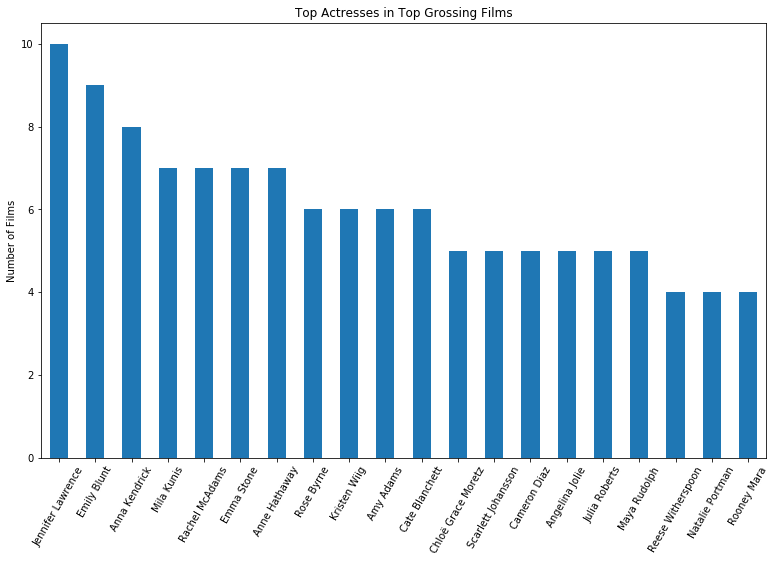

In [120]:
grossing_actress.primary_name.value_counts()[:20].plot(kind='bar', title='Top Actresses in Top Grossing Films',figsize=(13,8), rot=60)

plt.ylabel('Number of Films')
plt.show()

# Results:  
The top 3 actors are Mark Whalberg, Dwayne Johnson, and Matt Damon.  
The top 3 actresses are Jennifer Lawrence, Emily Blunt, and Anna Kendrick

# Conclusion:  
  
  To produce a movie that succeeds at the box office, it is recommended to produce an Action, Adventure, Drama, or Comedy film. These genres are the most popular amongst the top grossing films.  Another aspect to consider is the release date.  Having the film reach theatres from May to July and November to December is important for box office gross success.  These are the time periods that top-grossing films earn their success.  On top of genre and release date, it is also recommended to cast top performers like Matt Damon, Mark Whalberg, Dwayne Johnson, Anna Kendrick, Emily Blunt, and Jennifer Lawrence.  These castmembers have performed the most in successful movies.